# 1.What kind of libraries did you use?

In [2]:
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [3]:
path =  'D:/Assignments/Big Data Processing/assignments/assignment_3_crime/archive/Chicago_Crimes_2012_to_2017.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
data_new= df.loc[:,['ID','Date','Block','IUCR','Primary Type','Description','Location Description','Arrest',
                      'Domestic','Beat','District','FBI Code','Ward','Community Area','Location']]
data_new.shape

(1456714, 15)

# 2.What kind of attributes are there?

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


# 3. Is there missing values? If yes, how did you deal with those values?

In [6]:
df.isnull()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456710,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456711,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456712,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
drop = df.dropna()

In [7]:
drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1418365 non-null  int64  
 1   ID                    1418365 non-null  int64  
 2   Case Number           1418365 non-null  object 
 3   Date                  1418365 non-null  object 
 4   Block                 1418365 non-null  object 
 5   IUCR                  1418365 non-null  object 
 6   Primary Type          1418365 non-null  object 
 7   Description           1418365 non-null  object 
 8   Location Description  1418365 non-null  object 
 9   Arrest                1418365 non-null  bool   
 10  Domestic              1418365 non-null  bool   
 11  Beat                  1418365 non-null  int64  
 12  District              1418365 non-null  float64
 13  Ward                  1418365 non-null  float64
 14  Community Area        1418365 non-

In [8]:
data_new['Date'] = pd.to_datetime(data_new.Date,format='%m/%d/%Y %I:%M:%S %p') 
df['Date']=  pd.to_datetime(df.Date,format='%m/%d/%Y %I:%M:%S %p')

In [9]:
for i in (data_new,df):
    i['year']=i.Date.dt.year 
    i['month']=i.Date.dt.month 
    i['day']=i.Date.dt.day
    i['Hour']=i.Date.dt.hour 

# 4. Which are the top 5 or 10 crimes that occurred in the city.?

In [15]:
data_new['Primary Type'].value_counts().index.tolist()[:5]

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT']

In [17]:
data_new['Primary Type'].value_counts().index.tolist()[:10]

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'NARCOTICS',
 'ASSAULT',
 'OTHER OFFENSE',
 'BURGLARY',
 'DECEPTIVE PRACTICE',
 'MOTOR VEHICLE THEFT',
 'ROBBERY']

# 5. Can you visualize the frequencies of the top 5 or 10 crimes a year?

<AxesSubplot:>

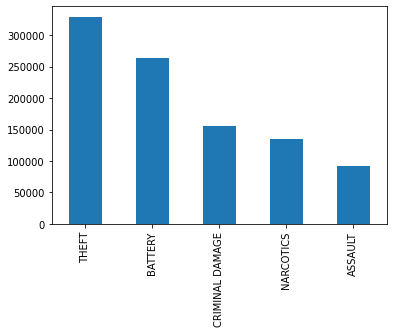

In [20]:
top5 = data_new['Primary Type'].value_counts()[:5]
top5.plot(kind='bar')

<AxesSubplot:>

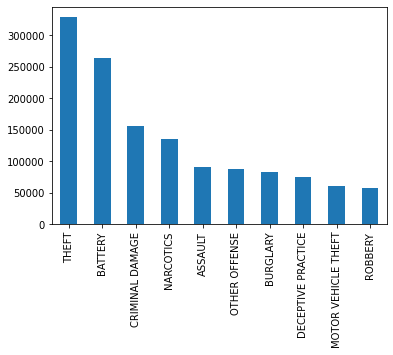

In [21]:
top10 = data_new['Primary Type'].value_counts()[:10]
top10.plot(kind='bar')

# 6. What is the arrest rate for "Narcotics" crimes?

In [22]:
nc = 0
ac = 0
f =open(path)
data = csv.reader(f)
header =next(data)
for row in data :
    if(row[6] == 'NARCOTICS'):
       nc += 1
       if(str(row[9]) == 'True'):
            ac += 1
            
print(nc, ac)
x = ac/nc * 100
print("Arrest rate is " + str(x)+ "%")

135240 134317
Arrest rate is 99.31750961254066%


# 7. Which are the top 3 months with more crimes during a year?

<AxesSubplot:>

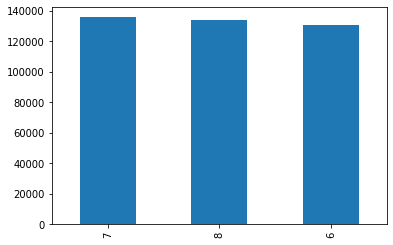

In [25]:
top_3month = data_new['month'].value_counts()[:3]
top_3month.plot(kind='bar')

# 8. When do crimes happen less during the days? (Fewer crime times during the days)

<AxesSubplot:>

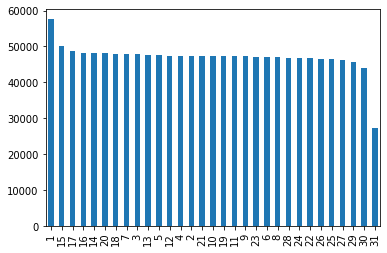

In [26]:
#daily crime rate
data_new['day'].value_counts().plot(kind='bar')

<AxesSubplot:>

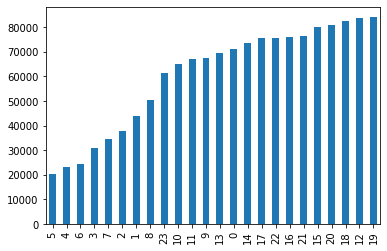

In [13]:
#hourly crime rate
data_new['Hour'].value_counts(ascending=True).plot(kind='bar')

# 9. How does sunset effects to increasing/descreasing number of crimes?

In [17]:
after_sunset = data_new[data_new['Hour']>16]['Hour'].value_counts(ascending=True).sum()
before_sunset = data_new[data_new['Hour']<17]['Hour'].value_counts(ascending=True).sum()

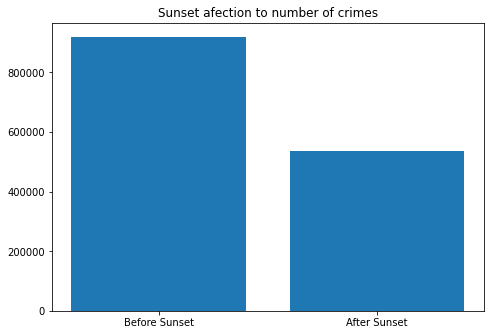

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
time = ['Before Sunset', 'After Sunset']
amount = [before_sunset, after_sunset]
ax.bar(time,amount)
ax.set_title('Sunset afection to number of crimes')
plt.show()

# 10. Can you visualize any crime in any district?

<AxesSubplot:xlabel='year,Primary Type'>

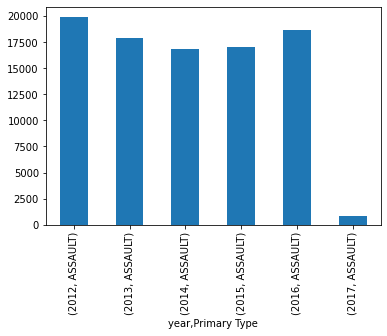

In [20]:
dist_name = data_new[data_new['District']==8.0]
crime_type = data_new[data_new['Primary Type']=='ASSAULT']
year = crime_type.year
crime_type.groupby(['year'])['Primary Type'].value_counts().plot(kind='bar')

# 11. Top 3 dangerous district in Chicago?

<AxesSubplot:>

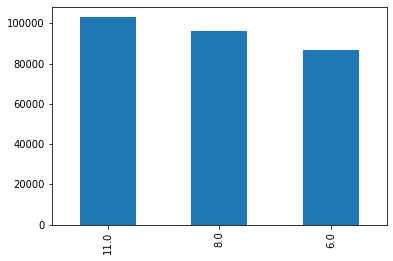

In [23]:
data_new['District'].value_counts().head(3).plot(kind='bar')